<a href="https://colab.research.google.com/github/DanYT2/machine_learning/blob/main/LSTM_July_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q

In [2]:
from datasets import load_dataset
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

print(tf.__version__)


2.12.0


In [3]:
dataset = load_dataset('nanyy1025/covid_fake_news')
dataset

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 6420
    })
    validation: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 2140
    })
    test: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 2140
    })
})

In [4]:
train_texts = dataset['train']['tweet']
train_labels = dataset['train']['label']

test_texts = dataset['test']['tweet']
test_labels = dataset['test']['label']

val_texts = dataset['validation']['tweet']
val_labels = dataset['validation']['label']

print(len(train_texts))
print(len(test_texts))
print(len(val_texts))

6420
2140
2140


In [5]:
df = pd.DataFrame()
df['text'] = train_texts + test_texts + val_texts
df['label'] = train_labels + test_labels + val_labels
df

,text,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
10695,Donald Trump wrongly claimed that New Zealand ...,fake
10696,Current understanding is #COVID19 spreads most...,real
10697,Nothing screams “I am sat around doing fuck al...,fake
10698,Birx says COVID-19 outbreak not under control ...,fake


In [6]:
def enc(label):
  return 1 if label == 'real' else 0

df['y'] = df['label'].apply(lambda x: enc(x))

In [7]:
df['text'] = df['text'].str.replace('[^\w\s]', '') # Removes punctuation
df['text'] = df['text'].str.replace('\d+', '') # Removes numbers
df['text'] = df['text'].str.replace('@', '') # Removes leading whitespace '@'
df['text'] = df['text'].str.replace('#', '') # Removes trailing whitespace '#'
df['text'] = df['text'].str.replace('\s+', ' ') # Removes extra whitespaces
df['text'] = df['text'].str.lower() # lowercase
df.head()


<ipython-input-7-55b1d4dfb4f0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', '') # Removes punctuation
<ipython-input-7-55b1d4dfb4f0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '') # Removes numbers
<ipython-input-7-55b1d4dfb4f0>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\s+', ' ') # Removes extra whitespaces


,text,label,y
0,the cdc currently reports deaths in general th...,real,1
1,states reported deaths a small rise from last ...,real,1
2,politically correct woman almost uses pandemic...,fake,0
3,indiafightscorona we have covid testing labora...,real,1
4,populous states can generate large case counts...,real,1


In [8]:
train_texts[3]

'#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ'

In [9]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['y'], test_size=0.2, random_state=42)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_seq = tokenizer.texts_to_sequences(train_texts)
test_seq = tokenizer.texts_to_sequences(test_texts)

In [11]:
print(train_texts[1])
print(train_texts[5])
print(train_texts[20])

states reported deaths a small rise from last tuesday southern states reported of those deaths httpstcoyasgrttux
covid act now found on average each person in illinois with covid is infecting other people data shows that the infection growth rate has declined over time this factors in the stayathome order and other restrictions put in place httpstcohhigddfe
no nobel prize laureate tasuku honjo didnt say the coronavirus is not natural as a post on facebook claims in fact professor honjo said hes greatly saddened his name was used to spread misinformation this and more in the latest coronacheck httpstcorlctuiciho httpstcowdooccixfu


In [12]:
print(len(train_seq[1]))
print(len(train_seq[5]))
print(len(train_seq[20]))

25
46
10


In [13]:
max_seq_length = max(max(map(len, train_seq)), max(map(len, train_seq)))
print(max_seq_length)

1446


In [14]:
train_data = pad_sequences(train_seq, maxlen = max_seq_length)
test_data = pad_sequences(test_seq, maxlen = max_seq_length)

In [15]:
print('GPU available: ', tf.config.list_physical_devices("GPU"))

GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
# from keras.api._v2.keras import activations
model = Sequential()

model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length = max_seq_length))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss =  'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=6, batch_size = 64)

Epoch 1/6
134/134 [==============================] - 58s 398ms/step - loss: 0.3427 - accuracy: 0.8474 - val_loss: 0.1976 - val_accuracy: 0.9234
Epoch 2/6
134/134 [==============================] - 18s 136ms/step - loss: 0.0886 - accuracy: 0.9682 - val_loss: 0.1959 - val_accuracy: 0.9248
Epoch 3/6
134/134 [==============================] - 14s 102ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.2273 - val_accuracy: 0.9346
Epoch 4/6
134/134 [==============================] - 14s 101ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.2440 - val_accuracy: 0.9290
Epoch 5/6
134/134 [==============================] - 13s 96ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.3079 - val_accuracy: 0.9336
Epoch 6/6
134/134 [==============================] - 12s 86ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.3378 - val_accuracy: 0.9299


In [19]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss)
print(acc)

67/67 [==============================] - 1s 19ms/step - loss: 0.3378 - accuracy: 0.9299
0.33780646324157715
0.9299065470695496


In [20]:
import matplotlib.pyplot as plt

def plot(history, string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show

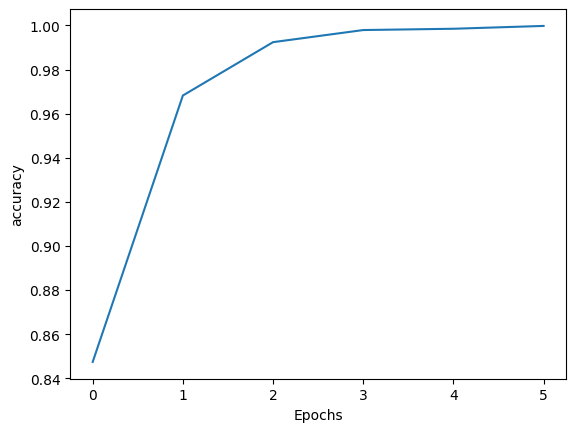

In [21]:
plot(history, 'accuracy')

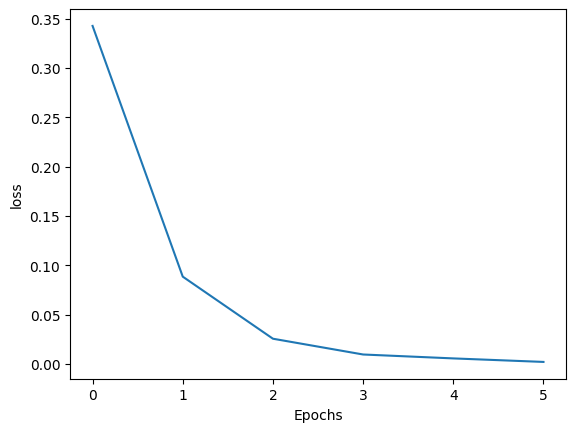

In [22]:
plot(history, 'loss')

<hr>

In [23]:
model.save('ICS_B.h5')

In [25]:
from tensorflow.keras.models import load_model

model2 = load_model('ICS_B.h5')

In [26]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1446, 100)         2046000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,163,377
Trainable params: 2,163,377
Non-trainable params: 0
_________________________________________________________________


In [24]:
import numpy as np

def classify_text(model, tokenizer, text):
  seq = tokenizer.texts_to_sequences([text])
  seq = pad_sequences(seq, maxlen = model.input_shape[1])

  pred = model.predict(seq)
  pred_label = np.round(pred[0]).astype(int)

  if pred_label == 0:
    return 'fake news'
  else:
    return 'real news'

In [27]:
new_text = 'More infections reported in Southern Europe'
pred_label = classify_text(model2, tokenizer, new_text)
print(pred_label)

1/1 [==============================] - 0s 380ms/step
real news


In [ ]:
import numpy as np

def classify_text(model, tokenizer, text):
  seq = tokenizer.texts_to_sequences([text])
  seq = pad_sequences(seq, maxlen = model.input_shape[1])

  pred = model.predict(seq)
  pred_label = np.round(pred[0]).astype(int)

  if pred_label == 0:
    return 'fake news'
  else:
    return 'real news'